## Importation des librairies 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
from IPython import display
import pygame

pygame 2.1.2 (SDL 2.0.18, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Idée : Propagation du feu dans une forêt
# 0 = Terre
# 1 = Arbre
# 2 = Feu
# 3 = Mort

## Corps :

### Initialiser une forêt de taille n :

In [3]:
def create_database(x,y,p):
    return np.random.choice([0,1],size=(x,y),p=[1-p,p])

In [4]:
data = create_database(10,10,.9)
data


array([[1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1]])

### Afficher une forêt :

In [5]:
def aff_forest(x,y,forest):
    x1,y1 = np.where(forest==1)# Foret x 
    x2,y2 = np.where(forest==0) # Terre x
    x3,y3 = np.where(forest==2) # Feu x
    x4,y4 = np.where(forest==3)    
    plt.title("Propagation du feu dans une forêt",fontweight="bold",fontname="Arial",fontsize="15")
    plt.scatter(x1,y1,c='green',marker='.',s=30)
    plt.scatter(x2,y2,c='grey',marker='.',s=30)
    plt.scatter(x3,y3,c='red',marker='.',s=30)
    plt.scatter(x4,y4,c='black',marker='.',s=30)
    return 0

In [6]:
data[5][5]=2

0

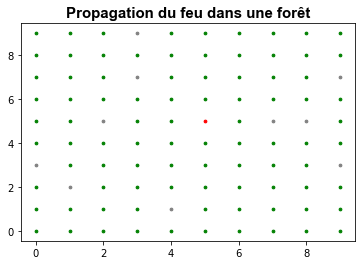

In [7]:
aff_forest(100,100,data)

In [8]:
data

array([[1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 2, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1]])

### Actualiser la forêt :

In [9]:
def init_fire_spread(forest):
    if(len(np.unique(forest))==2):
        x,y=np.where(forest==1)
        random_i = np.random.randint(0,len(x),1)
        i_x = int(x[random_i])
        i_y = int(y[random_i])
        forest[i_x][i_y]=2     
    return forest

In [10]:
init_fire_spread(data)

array([[1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 2, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1]])

In [11]:
def fire_spreading(forest):
    if((len(np.where(forest==2)[0])==0)and(len(np.where(forest==3)[0])==0)):
        init_fire_spread(forest)
    x,y = np.where(forest==2)
    for i in range(len(x)):
        if (x[i]<len(forest)-1) and (y[i]<len(forest[0])-1) and (x[i]>0) and (y[i] > 0):
            if forest[x[i]+1][y[i]]==1: #Droite
                forest[x[i]+1][y[i]]=2 
            if forest[x[i]-1][y[i]]==1: #Gauche
                forest[x[i]-1][y[i]]=2
            if forest[x[i]][y[i]+1]==1: #Haut
                forest[x[i]][y[i]+1]=2
            if forest[x[i]][y[i]-1]==1: #Bas
                forest[x[i]][y[i]-1]=2
            forest[x[i]][y[i]]=3
        else:
            forest[x[i]][y[i]]=3
            
    if(len(np.where(forest==2)[0])==0):
        nb_arbre = len(np.where(forest==3)[0])+len(np.where(forest==1)[0])
        nb_arbre_brule = len(np.where(forest==3)[0])
        print("Nombre d'arbres total : ",nb_arbre,"\n Nombre d'arbres brulés : ",nb_arbre_brule,"\n Proportion nb_arbre_brule/nb_arbre : ",(nb_arbre_brule/nb_arbre)*100,"%")
        return 0

In [12]:
fire_spreading(data)

### Simuler la propagation :

In [13]:
def launch(x,y,p):
    forest = create_database(x,y,p)
    print("Pourcentage d'arbre : ",p*100,"%")
    while fire_spreading(forest)!=0:
        init_fire_spread(forest)
        aff_forest(x,y,forest)
        plt.pause(0.01)
        display.clear_output(wait=True)
    print("Pourcentage d'arbre : ",p*100,"%")
    return aff_forest(x,y,forest)

Nombre d'arbres total :  1987 
 Nombre d'arbres brulés :  1945 
 Proportion nb_arbre_brule/nb_arbre :  97.88626069451435 %
Pourcentage d'arbre :  80.0 %


0

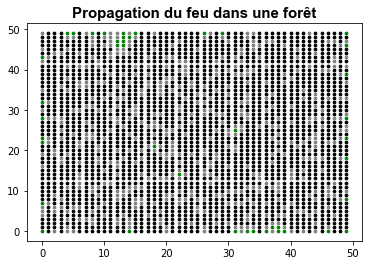

In [18]:
launch(50,50,.8)

In [20]:
def draw(data):
    x=0
    y=0
    unit=500/len(data)
    for i in range(len(data)):
        for j in range(len(data[0])):
            if(data[i][j]==1):
                pygame.draw.rect(screen,(71, 252, 80), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit
            if(data[i][j]==0):
                pygame.draw.rect(screen,(247, 213, 143), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit  
            if(data[i][j]==2):
                pygame.draw.rect(screen,(255, 64, 67), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit
            if(data[i][j]==3):
                pygame.draw.rect(screen,(33, 13, 4), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit
        y+=unit
        x=0

    pygame.display.flip()

In [ ]:
pygame.init()

screen = pygame.display.set_mode((500, 500))
screen.fill("white")
pygame.display.set_caption("Propagation d'un feu de forêt")

data = create_database(50,50,.9)

while fire_spreading(data)!=0:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
           pygame.quit()
    init_fire_spread(data)
    draw(data)
    plt.pause(0.1)
    display.clear_output(wait=True)
pygame.quit()